In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.describe()#to  get summary on numerical datapoint columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df["Property_Area"].value_counts()#finding frequency distribution of categorical data and check whether it makes sense

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

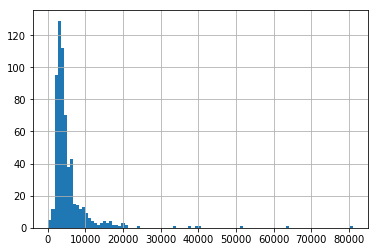

In [6]:
#distribution analysis on Applicants income
df["ApplicantIncome"].hist(bins=100)

#few extreme cases are seen below

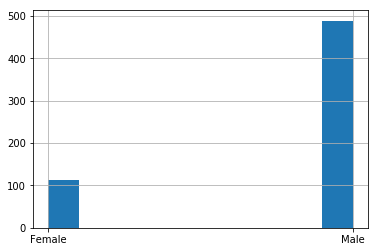

In [7]:
df["Gender"].hist()

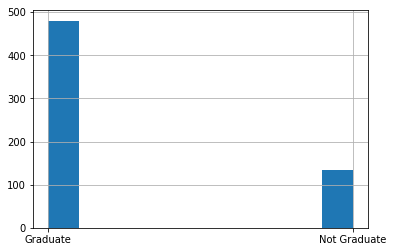

In [8]:
df["Education"].hist()

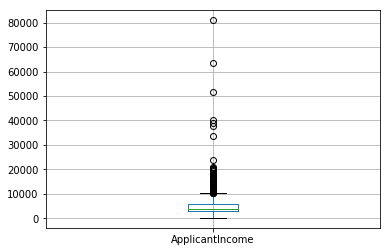

In [9]:
#boxplot distribution
df.boxplot(column="ApplicantIncome")
#we see some extreme values.maybe the difference comes about by the diffrent levels of education


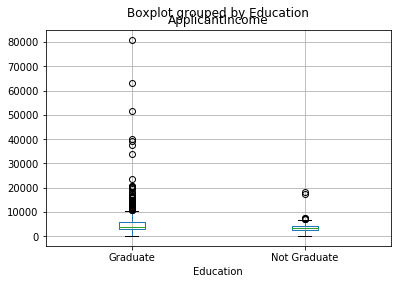

In [10]:
#trying to seggregate them by education levels
df.boxplot(column="ApplicantIncome",by="Education")
#from the boxplot below we see that there are few graduates with a highest income hence may act as outliers

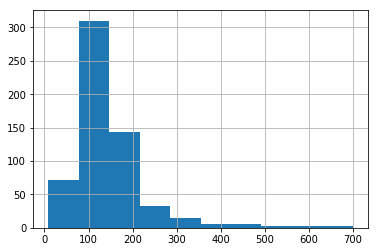

In [11]:
df["LoanAmount"].hist()

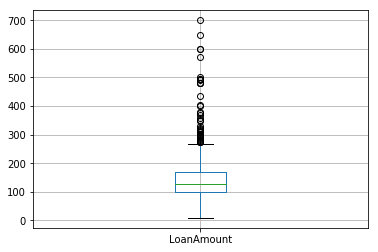

In [12]:
df.boxplot(column="LoanAmount")#there are few extreme values

In [13]:
df["Credit_History"].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [14]:
df.pivot_table(values="Loan_Status",index=["Credit_History"],aggfunc=lambda x:x.map({"Y":1,"N":0}).mean())

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


DATA MUNGLING
1.work on missing values
2.work on outliers appropriately

In [15]:
#filling missing values in loan amount
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)

In [16]:
df["Self_Employed"].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [17]:
#since 85.91 has a NO,we fill missing values with it.since it has a higher probability
df["Self_Employed"].fillna("No",inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


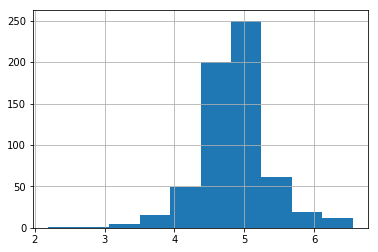

In [19]:
#dealing with extreme values of LoanAmount and ApplicantIncome
#log extreme values to nulfy their effect instead of automatically treating them like outliers
df["LoanAmount_log"]=np.log(df["LoanAmount"])
df["LoanAmount_log"].hist()

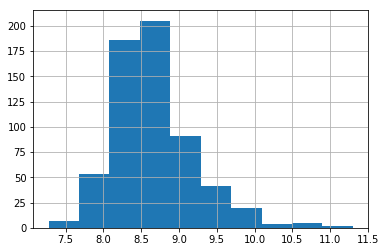

In [20]:
#working on extreme Amounts in Applicant income
#maybe an applicant has a lower income but their coApplicant has a higher income
#therefore combine both before log transform them
df["TotalIncome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df["TotalIncome_log"]=np.log(df["TotalIncome"])
df["TotalIncome_log"].hist()


In [21]:
df["Gender"].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [22]:
#since male has a higher probability ,we fil the missing gender values with it.
df["Gender"].fillna("Male",inplace=True)

In [23]:
df["Married"].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [24]:
df["Married"].fillna("Yes",inplace=True)

In [25]:
df["Dependents"].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [26]:
df["Dependents"].fillna("0",inplace=True)

In [27]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [28]:
df["Credit_History"].fillna(1,inplace=True)

In [29]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(),inplace=True)

In [30]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049,4.862066,7024.705081,8.669414
std,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.496575,6458.663872,0.545102
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225,1442.000000,7.273786
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4.607658,4166.000000,8.334712
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,4.859812,5416.500000,8.597205
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,5.104426,7521.750000,8.925549
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080,81000.000000,11.302204


In [31]:
#Building the model
#converting all categorical values to numeric by encoding them so that we'll be able to use sklearn
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"].astype("str"))
df["Education"]=le.fit_transform(df["Education"].astype("str"))
df["Married"]=le.fit_transform(df["Married"].astype("str"))
df["Self_Employed"]=le.fit_transform(df["Self_Employed"].astype("str"))
df["Dependents"]=le.fit_transform(df["Dependents"].astype("str"))
df["Property_Area"]=le.fit_transform(df["Property_Area"].astype("str"))



In [45]:
#defining a generic function that takes in a model as input and determines its accuracy and cross_validation scores
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null object
LoanAmount_log       614 non-null float64
TotalIncome          614 non-null float64
TotalIncome_log      614 non-null float64
dtypes: float64(7), int64(7), object(2)
memory usage: 76.8+ KB


In [34]:
#making a classification model and accessing its performance using a generic function
def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    prediction=model.predict(data[predictors])#making predictions on training set
    accuracy=metrics.accuracy_score(prediction,data[outcome])
    print("Accuracy:",accuracy)
    
    #KFold with 5 cross_validation folds
    kf=KFold(data.shape[0],n_folds=5)
    error=[]
    for train,test in kf:
        #filter training data
        train_predictors=(data[predictors].iloc[train,:])
        #target 
        train_target=(data[outcome].iloc[train])
        #training the model using the predictors and the model
        model.fit(train_predictors,train_target)
        #record an error from each cross_validation
        error.append(model.score(data[predictors].iloc[test,:],data[outcome].iloc[test]))
    print("cross_validation_score",np.mean(error))
    #fit the modelagain so that it can be referred outside the function
    model.fit(data[predictors],data[outcome])

#first model using logistic regression using Credity_History feature only
outcome_var="Loan_Status"
model=LogisticRegression()
prediction_var=["Credit_History"]
classification_model(model,df,prediction_var,outcome_var)
        
    

Accuracy: 0.8094462540716613
cross_validation_score 0.809462881514061


In [35]:
#prediction using more features
prediction_var=["Credit_History","TotalIncome"]
classification_model(model,df,prediction_var,outcome_var)

Accuracy: 0.8094462540716613
cross_validation_score 0.809462881514061


In [36]:
#even more features
prediction_var=["Credit_History","TotalIncome","Gender","Education","Married","Dependents"]
classification_model(model,df,prediction_var,outcome_var)

Accuracy: 0.8078175895765473
cross_validation_score 0.8045848327335733


In [37]:
#trying the second ALgorthim,which is the decision tree
model=DecisionTreeClassifier()
prediction_var=["Credit_History","LoanAmount_log","Dependents","Gender"]
classification_model(model,df,prediction_var,outcome_var)
#there is overffiting because there is a wide variatuoon between the accuracy and cross validation score

Accuracy: 0.9250814332247557
cross_validation_score 0.6873117419698789


In [46]:
#Using Random Forest
model=RandomForestClassifier(n_estimators=100)
prediction_var=["Credit_History","TotalIncome","Gender","Education","Married","Self_Employed","Dependents","Property_Area","TotalIncome_log","LoanAmount_log"]
classification_model(model,df,prediction_var,outcome_var)
#accuracy of 1 means overfitting has occured

Accuracy: 1.0
cross_validation_score 0.7850593096094894


In [39]:
#selecting the most important features
important_features=pd.Series(model.feature_importances_,index=prediction_var).sort_values(ascending=False)

In [40]:
important_features

Credit_History     0.261712
TotalIncome_log    0.190138
LoanAmount_log     0.186148
TotalIncome        0.182762
Property_Area      0.045915
Dependents         0.044402
Education          0.024468
Married            0.023252
Self_Employed      0.021112
Gender             0.020092
dtype: float64

In [48]:
#using the top four features since their their usefulness out 1 is very close i.e:0.26,0.19,0.186,0.182
model=RandomForestClassifier(n_estimators=100,max_depth=7,min_samples_split=25,max_features=1)
predictor_var=["Credit_History","TotalIncome_log","LoanAmount_log","Dependents"]
classification_model(model,df,prediction_var,outcome_var)


Accuracy: 0.8224755700325733
cross_validation_score 0.8013461282153805
